In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, precision_score
from sklearn.neural_network import MLPClassifier
from scripts.csv_continue_to_ds_discreet import csvContinue2DSDiscreet
from scripts.evaluate_model import evaluate_predictions

In [2]:
X, y = csvContinue2DSDiscreet()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

dall'analisi del dataset emergono i seguenti parametri

| Parametro | F | T | Type
| :--- | :--- | :--- | :--- |
| age_is_null | 41% | 29% | boolean |
| IsAlone | 51% | 30% | boolean |
| IsSmallFamily | 29% | 58% | boolean |
| IsBigFamily | 40% | 16% | boolean |
| isChild | 37% | 58% | boolean |
| isTeen | 38% | 43% | boolean |
| isAdult | 38% | 38% | boolean |
| isSenior | 38% | 40% | boolean |
| isOld | 39% | 27% | boolean |
| FirstClass | 31% | 63% | boolean |
| SecondClass | 36% | 47% | boolean |
| ThirdClass | 56% | 24% | boolean |
| EmbarkedS | 50% | 34% | boolean |
| EmbarkedC | 34% | 55% | boolean |
| EmbarkedQ | 38% | 39% | boolean |
| Male | 74% | 19% | boolean |

che si possono dividere nelle seguenti fasce

| Parametro | classi 
| :--- | :--- | :--- | :--- |
| age | age_is_null, isChild, isTeen, isAdult, isSenior, isOld |
| family | IsAlone, IsSmallFamily, IsBigFamily |
| class | FirstClass, SecondClass, ThirdClass |
| embarked | EmbarkedS, EmbarkedC, EmbarkedQ
| Sex | Male |

il tutto mi porta a pensare che debba esserci un primo livello nascosto pari a 5 e un secondo pari a 2


In [4]:
pipe = Pipeline([('mlp', MLPClassifier(random_state=0, hidden_layer_sizes=[5,2]))])

In [5]:
param_grid = {
  'mlp__alpha': [0.0001, 0.001, 0.01, 0.1, 1],
  'mlp__solver': ['adam', 'sgd'],
  'mlp__activation': ['relu', 'tanh'],
  'mlp__learning_rate': ['constant', 'adaptive'],
  'mlp__learning_rate_init': [0.001, 0.01, 0.1],
  'mlp__max_iter': [500, 1000, 2000],
  'mlp__momentum': [0.9, 0.95, 0.99]
  }

In [6]:
gs = RandomizedSearchCV(
  pipe,
  param_distributions=param_grid,
  scoring="roc_auc",
  cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0),
  verbose=1,
  n_jobs=-1,
  n_iter=500,
  random_state=0
)

In [7]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


,estimator,Pipeline(step...om_state=0))])
,param_distributions,"{'mlp__activation': ['relu', 'tanh'], 'mlp__alpha': [0.0001, 0.001, ...], 'mlp__learning_rate': ['constant', 'adaptive'], 'mlp__learning_rate_init': [0.001, 0.01, ...], ...}"
,n_iter,500
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,0
,error_score,nan


In [8]:
nn = gs.best_estimator_
nn.fit(X_train, y_train)

,steps,"[('mlp', ...)]"
,transform_input,None
,memory,None
,verbose,False
,hidden_layer_sizes,"[5, 2]"
,activation,'tanh'
,solver,'adam'
,alpha,0.1
,batch_size,'auto'
,learning_rate,'adaptive'
,learning_rate_init,0.001


In [9]:
y_train_pred = nn.predict(X_train)
y_train_pred_proba = nn.predict_proba(X_train)
y_test_pred = nn.predict(X_test)
y_test_pred_proba = nn.predict_proba(X_test)


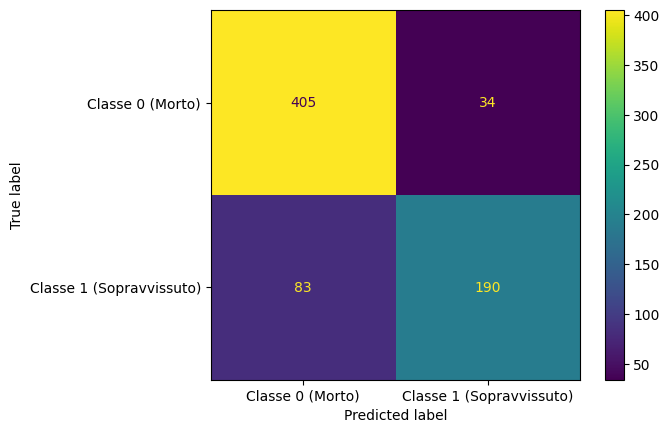

Percentuale di veri negativi: 92.26%
Percentuale di veri positivi: 69.60%
                          precision    recall  f1-score   support

        Classe 0 (Morto)       0.83      0.92      0.87       439
Classe 1 (Sopravvissuto)       0.85      0.70      0.76       273

                accuracy                           0.84       712
               macro avg       0.84      0.81      0.82       712
            weighted avg       0.84      0.84      0.83       712

[[405  34]
 [ 83 190]]


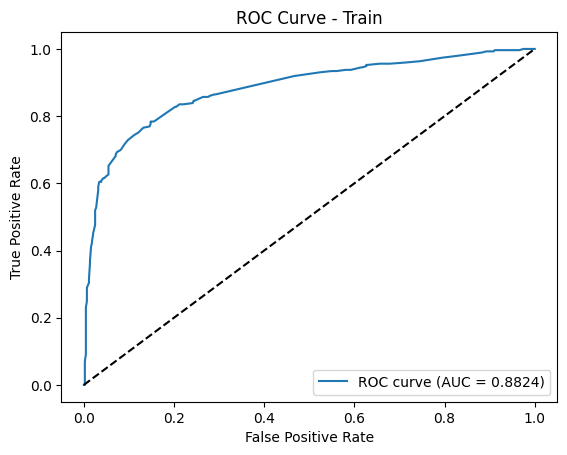

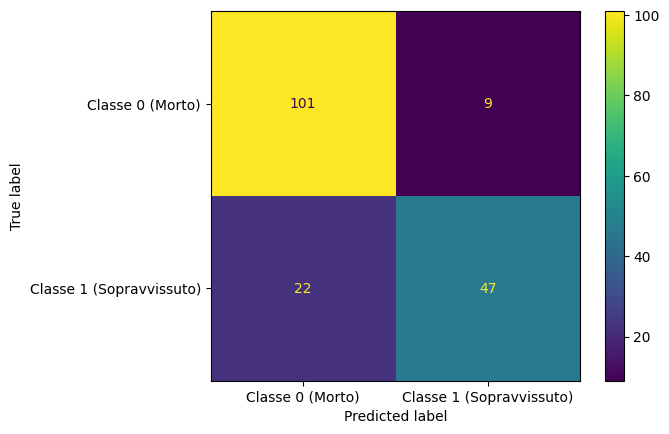

Percentuale di veri negativi: 91.82%
Percentuale di veri positivi: 68.12%
                          precision    recall  f1-score   support

        Classe 0 (Morto)       0.82      0.92      0.87       110
Classe 1 (Sopravvissuto)       0.84      0.68      0.75        69

                accuracy                           0.83       179
               macro avg       0.83      0.80      0.81       179
            weighted avg       0.83      0.83      0.82       179

[[101   9]
 [ 22  47]]


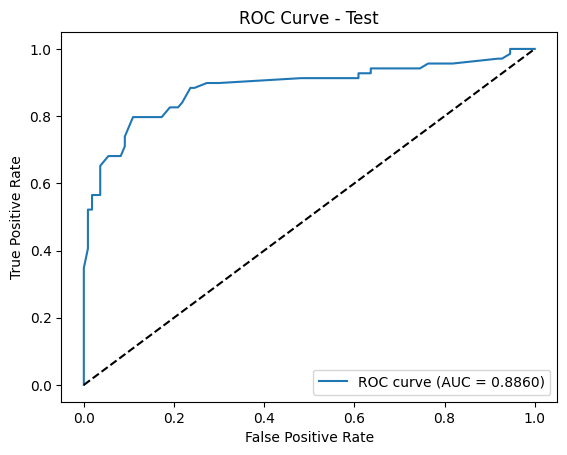

In [10]:
evaluate_predictions(y_train_pred, y_train, y_train_pred_proba[:,1], "Train")
evaluate_predictions(y_test_pred, y_test, y_test_pred_proba[:,1], "Test")